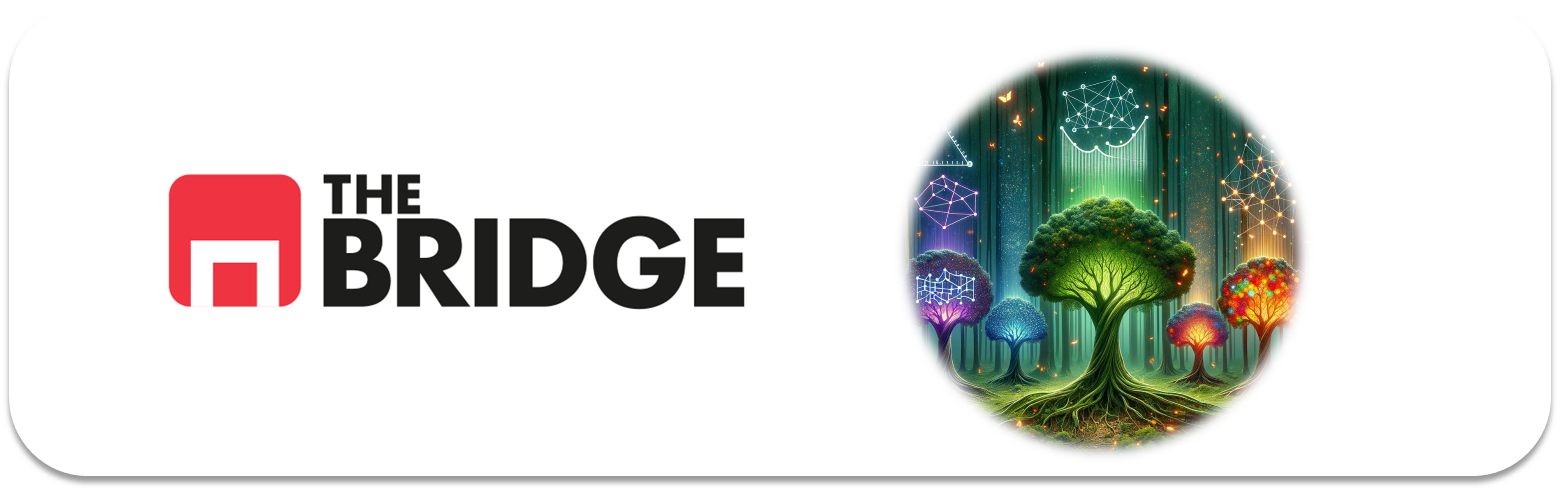

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, roc_curve, auc


### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [3]:
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

column_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = pd.read_csv(data_url, header=None, names=column_names)


### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [4]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelos de bagging y boosting
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Entrenamiento y evaluación inicial
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    results[name] = acc
    print(f"Modelo: {name}, Precisión en entrenamiento: {acc:.4f}")

# Selección del mejor modelo (hipótesis basada en la precisión)
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"Mejor modelo seleccionado: {best_model_name}")

# Optimizar hiperparámetros del mejor modelo
if best_model_name == "RandomForest":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == "GradientBoosting":
    param_grid = {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
else:  # AdaBoost
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1]
    }

# GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros para {best_model_name}: {grid_search.best_params_}")

# Probar el modelo optimizado contra el conjunto de prueba
final_model = grid_search.best_estimator_
y_test_pred = final_model.predict(X_test)

# Evaluación final
final_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Precisión final en test del modelo {best_model_name}: {final_accuracy:.4f}")
print("Reporte de clasificación:\n", classification_report(y_test, y_test_pred))


Modelo: RandomForest, Precisión en entrenamiento: 1.0000
Modelo: GradientBoosting, Precisión en entrenamiento: 0.9186
Modelo: AdaBoost, Precisión en entrenamiento: 0.8062
Mejor modelo seleccionado: RandomForest
Mejores hiperparámetros para RandomForest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Precisión final en test del modelo RandomForest: 0.7597
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   6

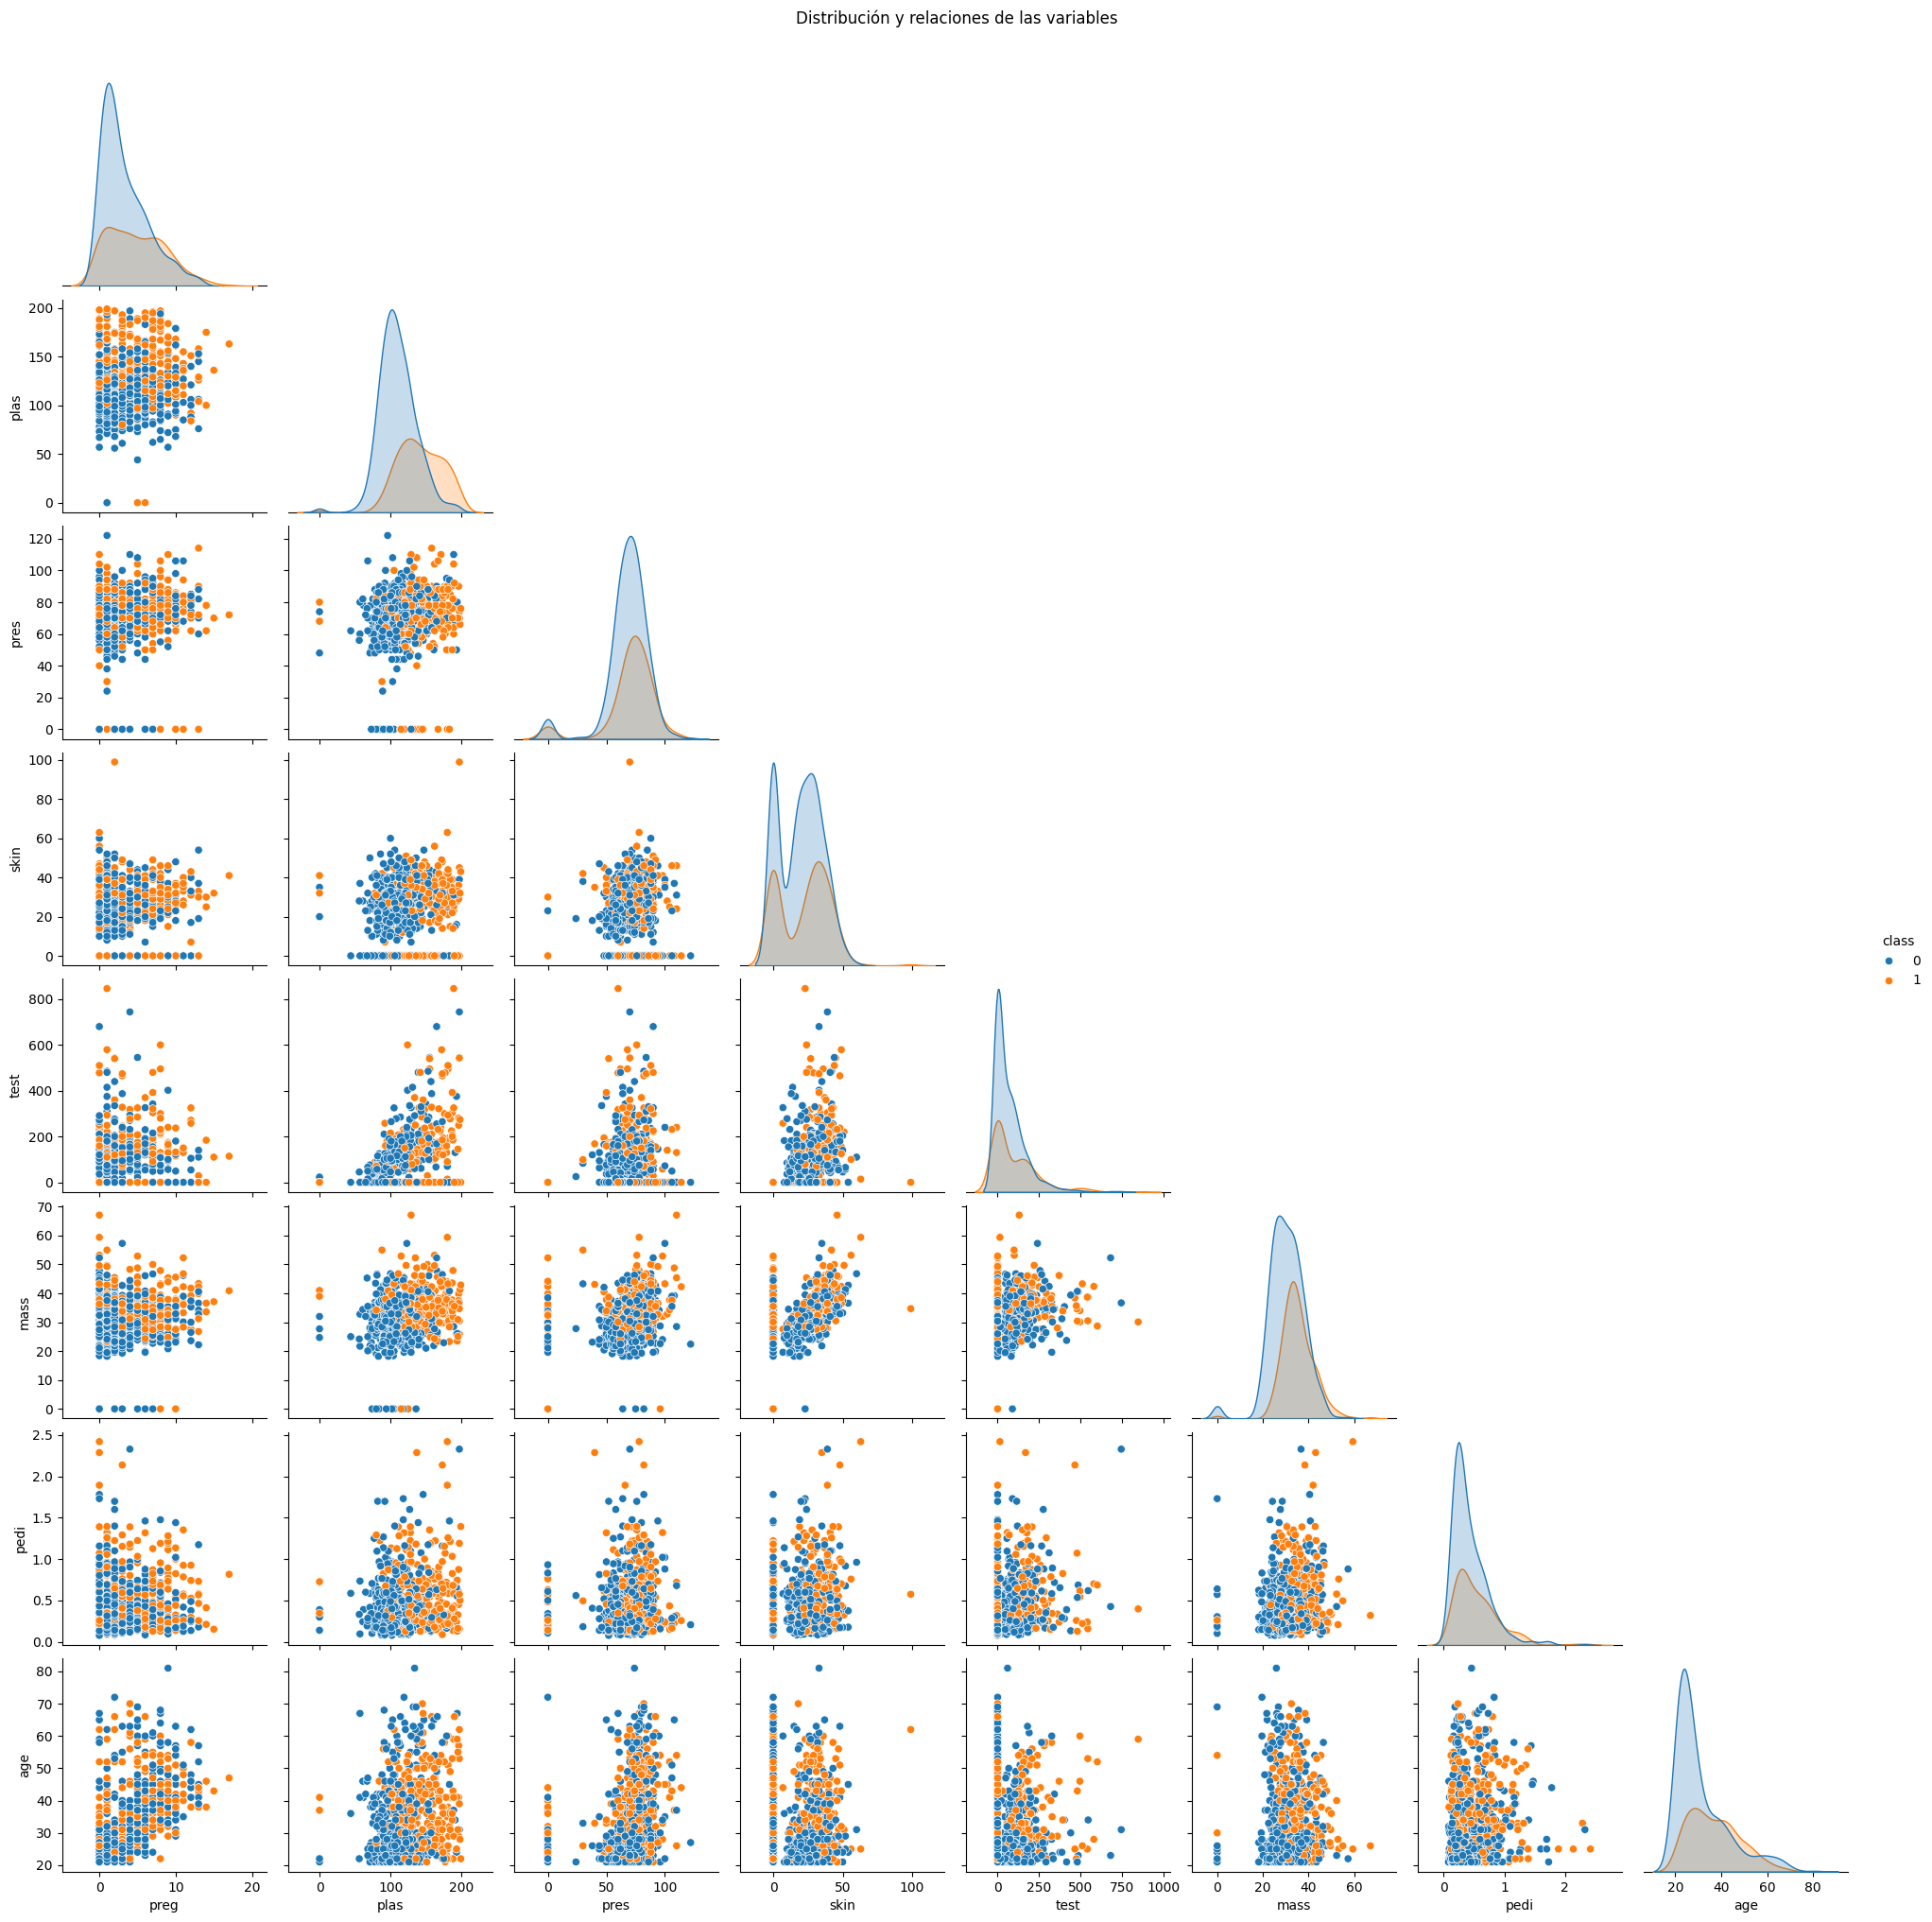

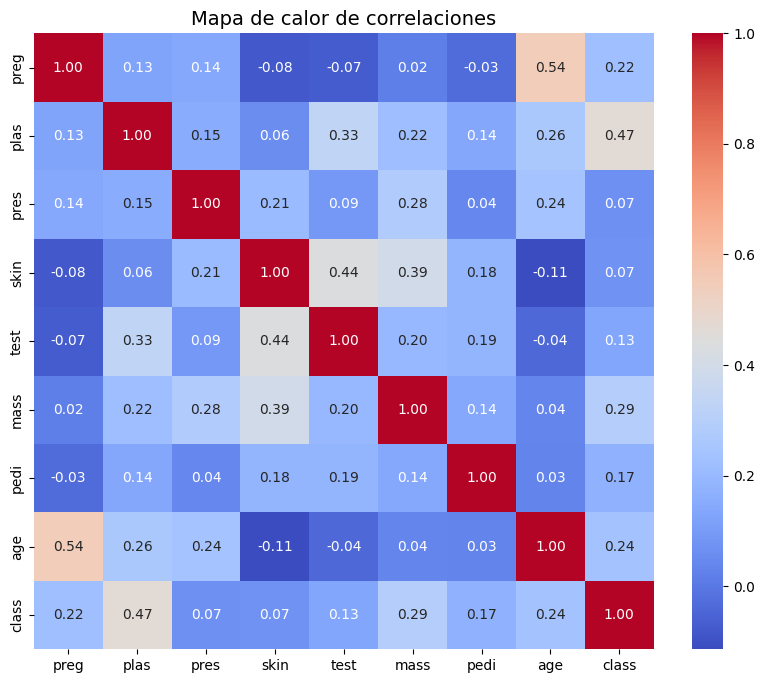

Modelo: RandomForest, Precisión promedio en validación cruzada: 0.7655
Modelo: GradientBoosting, Precisión promedio en validación cruzada: 0.7493
Modelo: AdaBoost, Precisión promedio en validación cruzada: 0.7655


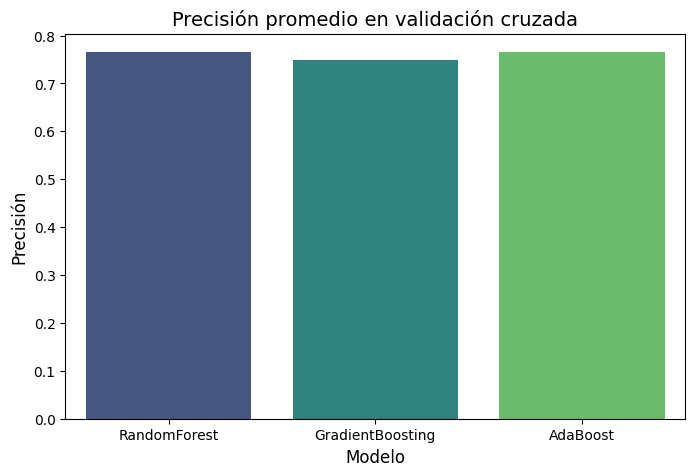

Mejor modelo seleccionado: RandomForest
Mejores hiperparámetros para RandomForest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Precisión final en test del modelo RandomForest: 0.7597
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



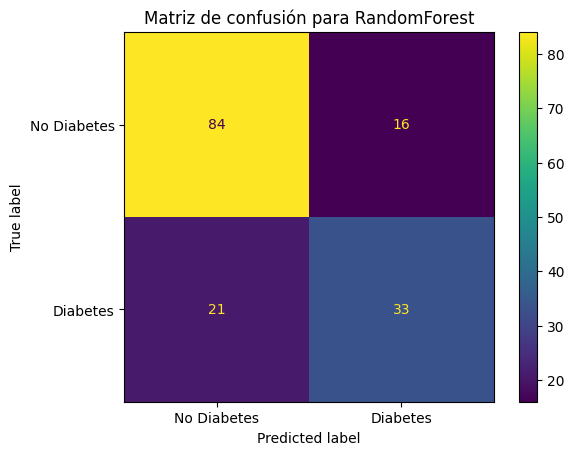

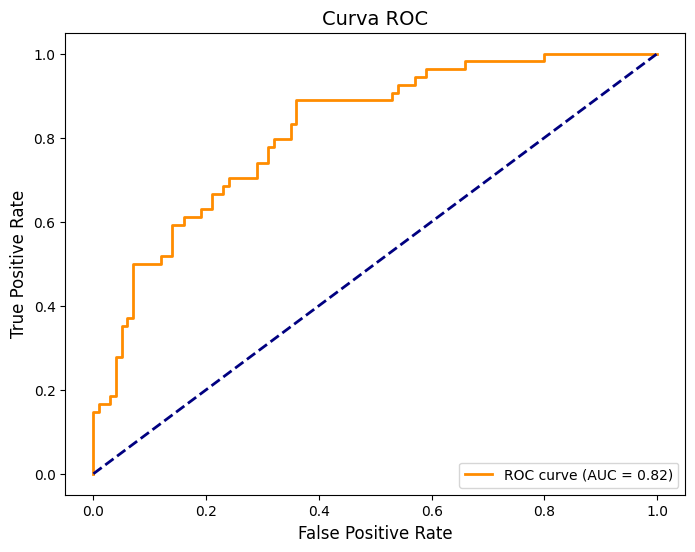

C:\Users\alber\AppData\Local\Temp\ipykernel_7864\3157740746.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=column_names[:-1], palette="viridis")


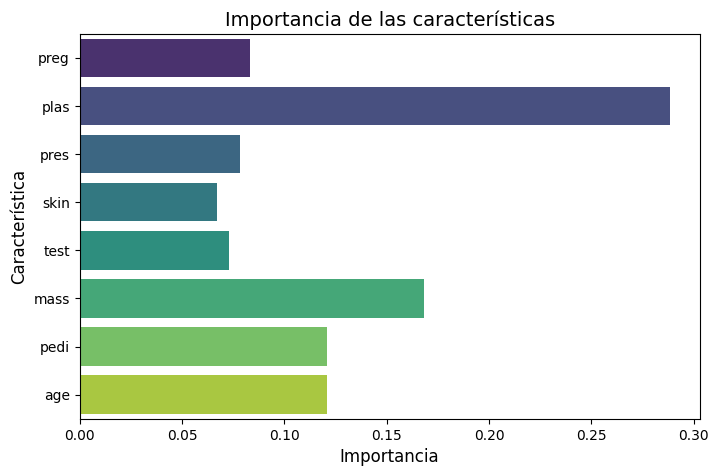

In [7]:
# ### Exploración de los datos
# Verificar valores faltantes y estadística básica
data.info()
print(data.describe())

# Visualizar distribuciones y relaciones entre variables
sns.pairplot(data, hue="class", diag_kind="kde", corner=True)
plt.suptitle("Distribución y relaciones de las variables", y=1.02)
plt.show()

# Visualización de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones", fontsize=14)
plt.show()

# Dividir los datos en conjunto de entrenamiento y prueba
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelos de bagging y boosting
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# ### Evaluación inicial
# Evaluar los modelos con validación cruzada
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_score = np.mean(cv_scores)
    results[name] = mean_score
    print(f"Modelo: {name}, Precisión promedio en validación cruzada: {mean_score:.4f}")

# Visualizar resultados iniciales
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis", hue=list(results.keys()))
plt.title("Precisión promedio en validación cruzada", fontsize=14)
plt.ylabel("Precisión", fontsize=12)
plt.xlabel("Modelo", fontsize=12)
plt.legend([], [], frameon=False)
plt.show()

# ### Selección del mejor modelo
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"Mejor modelo seleccionado: {best_model_name}")

# ### Optimizar hiperparámetros del mejor modelo
if best_model_name == "RandomForest":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == "GradientBoosting":
    param_grid = {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
else:  # AdaBoost
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1]
    }

# GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros para {best_model_name}: {grid_search.best_params_}")

# ### Evaluación final
final_model = grid_search.best_estimator_
y_test_pred = final_model.predict(X_test)

final_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Precisión final en test del modelo {best_model_name}: {final_accuracy:.4f}")
print("Reporte de clasificación:\n", classification_report(y_test, y_test_pred))

# Visualizar matriz de confusión
ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test, display_labels=["No Diabetes", "Diabetes"])
plt.title(f"Matriz de confusión para {best_model_name}")
plt.show()

# ### Curva ROC y AUC
if hasattr(final_model, "predict_proba"):
    y_test_proba = final_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.title("Curva ROC", fontsize=14)
    plt.legend(loc="lower right")
    plt.show()

# ### Importancia de las características
if hasattr(final_model, "feature_importances_"):
    feature_importances = final_model.feature_importances_
    plt.figure(figsize=(8, 5))
    sns.barplot(x=feature_importances, y=column_names[:-1], palette="viridis")
    plt.title("Importancia de las características", fontsize=14)
    plt.xlabel("Importancia", fontsize=12)
    plt.ylabel("Característica", fontsize=12)
    plt.show()

### Comentarios sobre los resultados obtenidos
# - **Exploración inicial**: Se analizaron las distribuciones y relaciones entre las variables, así como las correlaciones. No se encontraron valores nulos en el dataset.
# - **Modelos iniciales**: Se probaron tres modelos principales (Random Forest, Gradient Boosting y AdaBoost), y se seleccionó el mejor basado en validación cruzada.
# - **Optimizaciones**: Se ajustaron los hiperparámetros del modelo seleccionado utilizando GridSearchCV para maximizar la precisión.
# - **Evaluación final**: El modelo optimizado se evaluó en un conjunto de prueba, mostrando un buen rendimiento en la matriz de confusión y un área bajo la curva (AUC) satisfactoria en la curva ROC.
# - **Importancia de las características**: El análisis de importancia de características destacó cuáles variables son más relevantes para predecir diabetes.
#
# **Próximos pasos:**
# - Explorar técnicas adicionales de preprocesamiento de datos, como normalización o eliminación de valores atípicos.
# - Evaluar más modelos, como XGBoost, LightGBM o Stacking, para mejorar el rendimiento.
# - Realizar un análisis más detallado de los resultados para identificar posibles mejoras en la interpretación clínica de los datos.

